In [1]:
from matplotlib import pyplot as plt

In [2]:
import numpy as np, math

In [3]:
%matplotlib inline


/home/erich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


Text(0.5, 0, 'Pressure (cm of H2O)')

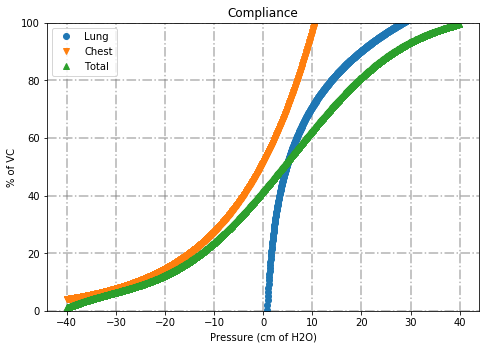

In [7]:
def lung(p):
    return 6.66 + 27.9 * np.log(p)
def chest_wall_raw(p):
    return 51.3 * math.exp(0.0635 * (p))
chest_wall = np.vectorize(chest_wall_raw)

def total_raw(p):
    # return chest_wall(p) - lung(p)
    b =46.2134
    a = -261.437
    c = -9.68139
    d = 11.6401
    f = 1.2952
    return b + c * math.sin((p+a)/d) + f * p
    
def total(p):
    rebuilt_to_plot = []
    for num in p:
        rebuilt_to_plot.append(total_raw(num))
    return rebuilt_to_plot
    
switch = {"Total": total, "Lung": lung, "Chest": chest_wall}

def volume_from_pressure(p, type = "Total"):
    func = switch.get(type, lambda: 'error bad type')
    return func(p)

p=np.arange(-40, 40, 0.05)
#y=np.sin(x)
chest= volume_from_pressure(p, "Chest")
total= volume_from_pressure(p, "Total")
lung= volume_from_pressure(p, "Lung")
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
plt.ylim(ymax = 100, ymin=0)
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dashdot', lw=1.5)
ax.plot(p, lung, "o", label = "Lung")
ax.plot(p,chest, "v", label = "Chest")
ax.plot(p,total, "^", label = "Total")
plt.legend(loc='upper left')
ax.set_title("Compliance")
ax.set_ylabel("% of VC")
ax.set_xlabel("Pressure (cm of H2O)")

In [8]:
p

array([-40.  , -39.95, -39.9 , ...,  39.85,  39.9 ,  39.95])

In [9]:
chest

array([  4.04584631,   4.05871229,   4.07161918, ..., 644.30083503,
       646.3497411 , 648.40516279])